In [169]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn import metrics

In [195]:
munchen = pd.read_csv('/Users/christine/Desktop/DataScienceProject/München2017Prozente.csv', encoding= 'utf-8', sep=',', header=0)
dresden =  pd.read_csv('/Users/christine/Desktop/DataScienceProject/Dresden2017Prozente.csv', encoding= 'utf-8', sep=',', header=0)
frankfurt = pd.read_csv('/Users/christine/Desktop/DataScienceProject/Frankfurt2017Prozente.csv', encoding= 'utf-8', sep=',', header=0)
hamburg = pd.read_csv('/Users/christine/Desktop/DataScienceProject/Hamburg2017Prozente.csv', encoding= 'utf-8', sep=',', header=0)
columns = ['Stadt', 'Stadtteilname', 'CDU', 'SPD', 'Grüne', 'FDP', 'AfD',
       'Linke', 'Piraten']
data = pd.DataFrame(columns=columns)
for i in range(0, len(munchen)):
    data.at[i, 'Stadt'] = 'München'
    data.at[i, 'Stadtteilname'] = float(munchen.loc[i, 'Stadtteilname'])
    data.at[i, 'CDU'] = float((munchen.loc[i, 'CDU'][:-1]).replace(',', '.'))
    data.at[i, 'SPD'] = float((munchen.loc[i, 'SPD'][:-1]).replace(',', '.'))
    data.at[i, 'Grüne'] = float((munchen.loc[i, 'Grüne'][:-1][:-1]).replace(',', '.'))
    data.at[i, 'FDP'] = float((munchen.loc[i, 'FDP'][:-1]).replace(',', '.'))
    data.at[i, 'AfD'] = float((munchen.loc[i, 'AfD'][:-1]).replace(',', '.'))
    data.at[i, 'Linke'] = float((munchen.loc[i, 'Linke'][:-1]).replace(',', '.'))
    data.at[i, 'Piraten'] = float((munchen.loc[i, 'Piraten'][:-1]).replace(',', '.'))
data1 = data.copy()    
for i in range(0, len(frankfurt)):
    j = i + len(data1)
    data.at[j, 'Stadt'] = 'Frankfurt'
    data.at[j, 'Stadtteilname'] = frankfurt.loc[i, 'Stadtteilname']
    data.at[j, 'CDU'] = float((frankfurt.loc[i, 'CDU']).replace(',', '.'))
    data.at[j, 'SPD'] = float((frankfurt.loc[i, 'SPD']).replace(',', '.'))
    data.at[j, 'Grüne'] = float((frankfurt.loc[i, 'Grüne']).replace(',', '.'))
    data.at[j, 'FDP'] = float((frankfurt.loc[i, 'FDP']).replace(',', '.'))
    data.at[j, 'AfD'] = float((frankfurt.loc[i, 'AfD']).replace(',', '.'))
    data.at[j, 'Linke'] = float((frankfurt.loc[i, 'Linke']).replace(',', '.'))
    data.at[j, 'Piraten'] = float((frankfurt.loc[i, 'Piraten']).replace(',', '.'))
data1 = data.copy()    
for i in range(0, 99):
    j = i + len(data1)
    data.at[j, 'Stadt'] = 'Hamburg'
    data.at[j, 'Stadtteilname'] = hamburg.loc[i, 'Stadtteilname']
    if(isinstance(hamburg.loc[i, 'CDU'], str)):
        data.at[j, 'CDU'] = float((hamburg.loc[i, 'CDU']).replace(',', '.'))
    else:
        data.at[j, 'CDU'] = np.nan
    if(isinstance(hamburg.loc[i, 'SPD'], str)):
        data.at[j, 'SPD'] = float((hamburg.loc[i, 'SPD']).replace(',', '.'))
    else:
        data.at[j, 'SPD'] =  np.nan
    if(isinstance(hamburg.loc[i, 'Grüne'], str)):
        data.at[j, 'Grüne'] = float((hamburg.loc[i, 'Grüne']).replace(',', '.'))
    else:
        data.at[j, 'Grüne'] =  np.nan
    if(isinstance(hamburg.loc[i, 'FDP'], str)):
        data.at[j, 'FDP'] = float((hamburg.loc[i, 'FDP']).replace(',', '.'))
    else:
        data.at[j, 'FDP'] =  np.nan
    if(isinstance(hamburg.loc[i, 'Linke'], str)):
        data.at[j, 'Linke'] = float((hamburg.loc[i, 'Linke']).replace(',', '.'))
    else:
        data.at[j, 'Linke'] =  np.nan
    if(isinstance(hamburg.loc[i, 'AfD'], str)):
        data.at[j, 'AfD'] = float((hamburg.loc[i, 'AfD']).replace(',', '.'))
    else:
        data.at[j, 'AfD'] =  np.nan

#    data.at[j, 'Piraten'] = float((hamburg.loc[i, 'Piraten']).replace(',', '.'))
    data.at[j, 'Piraten'] = 0
data1 = data.copy()   
for i in range(0, len(dresden)):
    j = i + len(data1)
    data.at[j, 'Stadt'] = 'Dresden'
    data.at[j, 'Stadtteilname'] = dresden.loc[i, 'Stadtteilname']
    data.at[j, 'CDU'] = float(dresden.loc[i, 'CDU'])
    data.at[j, 'SPD'] = float(dresden.loc[i, 'SPD'])
    data.at[j, 'Grüne'] = float(dresden.loc[i, 'Grüne'])
    data.at[j, 'FDP'] = float(dresden.loc[i, 'FDP'])
    data.at[j, 'AfD'] = float(dresden.loc[i, 'AfD'])
    data.at[j, 'Linke'] = float(dresden.loc[i, 'Linke'])
    data.at[j, 'Piraten'] = float(dresden.loc[i, 'Piraten'])

data.dropna
print(len(data))
print(len(dresden))
print(len(hamburg))
print(len(munchen))
print(len(frankfurt))


701
479
101
78
45


<Figure size 648x648 with 0 Axes>

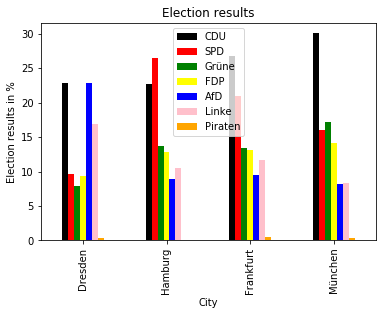

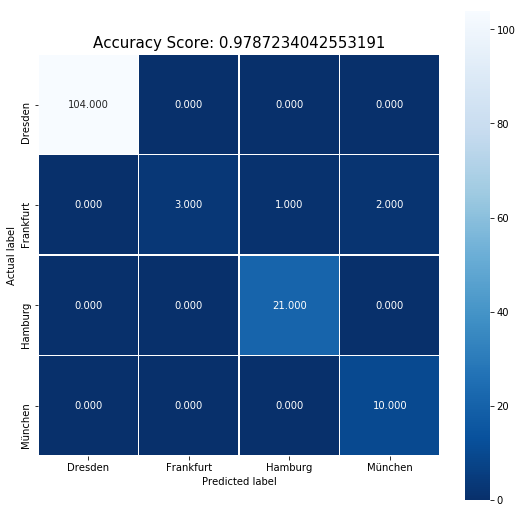

In [196]:
# Multiple logistic regression to decide Frankfurt, Dresden, Hamburg or München?
data_set = data.copy()
data_x = data.loc[:, 'CDU':'Piraten']
data_y = data_set.loc[:,'Stadt']
data_y = data_y.astype('str')
drsdn = (data.loc[data['Stadt'].isin(['Dresden'])])
hmbrg = (data.loc[data['Stadt'].isin(['Hamburg'])])
frnkfrt = (data.loc[data['Stadt'].isin(['Frankfurt'])])
mnchn = (data.loc[data['Stadt'].isin(['München'])])
columns = ['Stadt', 'CDU', 'SPD', 'Grüne', 'FDP', 'AfD',
       'Linke', 'Piraten']
means = pd.DataFrame(columns=columns)
means.at[0, 'Stadt'] = 'Dresden'
means.at[0, 'CDU'] = np.mean(drsdn['CDU'].values)
means.at[0, 'SPD'] = np.mean(drsdn['SPD'].values)
means.at[0, 'Grüne'] = np.mean(drsdn['Grüne'].values)
means.at[0, 'FDP'] = np.mean(drsdn['FDP'].values)
means.at[0, 'AfD'] = np.mean(drsdn['AfD'].values)
means.at[0, 'Linke'] = np.mean(drsdn['Linke'].values)
means.at[0, 'Piraten'] = np.mean(drsdn['Piraten'].values)
means.at[1, 'Stadt'] = 'Hamburg'
means.at[1, 'CDU'] = np.mean(hmbrg['CDU'].values)
means.at[1, 'SPD'] = np.mean(hmbrg['SPD'].values)
means.at[1, 'Grüne'] = np.mean(hmbrg['Grüne'].values)
means.at[1, 'FDP'] = np.mean(hmbrg['FDP'].values)
means.at[1, 'AfD'] = np.mean(hmbrg['AfD'].values)
means.at[1, 'Linke'] = np.mean(hmbrg['Linke'].values)
means.at[1, 'Piraten'] = np.mean(hmbrg['Piraten'].values)
means.at[2, 'Stadt'] = 'Frankfurt'
means.at[2, 'CDU'] = np.mean(frnkfrt['CDU'].values)
means.at[2, 'SPD'] = np.mean(frnkfrt['SPD'].values)
means.at[2, 'Grüne'] = np.mean(frnkfrt['Grüne'].values)
means.at[2, 'FDP'] = np.mean(frnkfrt['FDP'].values)
means.at[2, 'AfD'] = np.mean(frnkfrt['AfD'].values)
means.at[2, 'Linke'] = np.mean(frnkfrt['Linke'].values)
means.at[2, 'Piraten'] = np.mean(frnkfrt['Piraten'].values)
means.at[3, 'Stadt'] = 'München'
means.at[3, 'CDU'] = np.mean(mnchn['CDU'].values)
means.at[3, 'SPD'] = np.mean(mnchn['SPD'].values)
means.at[3, 'Grüne'] = np.mean(mnchn['Grüne'].values)
means.at[3, 'FDP'] = np.mean(mnchn['FDP'].values)
means.at[3, 'AfD'] = np.mean(mnchn['AfD'].values)
means.at[3, 'Linke'] = np.mean(mnchn['Linke'].values)
means.at[3, 'Piraten'] = np.mean(mnchn['Piraten'].values)

plt.figure(figsize=(9,9))
means.plot(x="Stadt", y=['CDU', 'SPD', 'Grüne', 'FDP', 'AfD',
       'Linke', 'Piraten'], kind="bar", color= ['black', 'red', 'green', 'yellow', 'blue', 'pink', 'orange'])
plt.ylabel('Election results in %')
plt.xlabel('City')
plt.title("Election results")
plt.savefig('/Users/christine/Desktop/DataScienceProject/Wahlergebnis.png')


x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=10000)

logisticRegr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

logisticRegr.fit(x_train, y_train)
#print(logisticRegr.classes_)

predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
#print(score)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels = ['Dresden', 'Frankfurt' ,'Hamburg' ,'München'], yticklabels = ['Dresden', 'Frankfurt' ,'Hamburg' ,'München']);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('/Users/christine/Desktop/DataScienceProject/acurracy.png')
#plt.show();
